In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nba_data = pd.read_csv('all_seasons.csv')
nba_data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [3]:
print(nba_data.dtypes)

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object


In [5]:
players_ages = nba_data['age']
minimum_age = players_ages.min()
maximum_age = players_ages.max()
print('The minimum and maximum ages of players are {} and {}'.format(minimum_age, maximum_age))

The minimum and maximum ages of players are 18.0 and 44.0


In [6]:
bins = [15, 20, 25, 30, 35, 40, 45]
nba_data['binned_ages'] = pd.cut(nba_data['age'], bins)
print(nba_data[['binned_ages', 'age']])

      binned_ages   age
0        (20, 25]  22.0
1        (25, 30]  27.0
2        (25, 30]  30.0
3        (25, 30]  29.0
4        (20, 25]  22.0
...           ...   ...
11695    (25, 30]  30.0
11696    (25, 30]  28.0
11697    (20, 25]  25.0
11698    (30, 35]  31.0
11699    (20, 25]  25.0

[11700 rows x 2 columns]


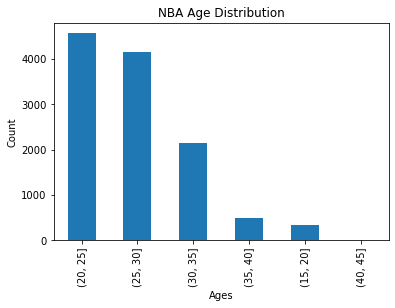

In [7]:
nba_data['binned_ages'].value_counts().plot(kind='bar')

plt.title('NBA Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Count')

plt.show()

In [8]:
#A general description of the dataset
nba_data.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,5849.500000,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,3377.643409,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2924.750000,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,5849.500000,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,8774.250000,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,11699.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


The 75th percentile of rebounds is 4.7 rebounds/game. This means that to be the top 25% in this timeframe in rebounding, you only have to get 5 rebounds every game. Still, something that sounds so simple isn't an easy feat - this is the greatest basketball league in the world, after all.

Also, the 75% percentile of points scored is 11.5/game. This means that to be a in the top 25% point scorer in this era you only need to have 12 point per game, that is either making four three-points per game or six two-point.

Similarly, to be in the top 25% of assists/game throughout this period, you only have to average 3 dimes/game. This will be interesting to analyze as we see where the bottom 75th percentile lie and what types of players give (and don't give) the most assists.

On average, players tend to have a negative net rating, meaning they let the opponents score more points than their team themselves score

<AxesSubplot:>

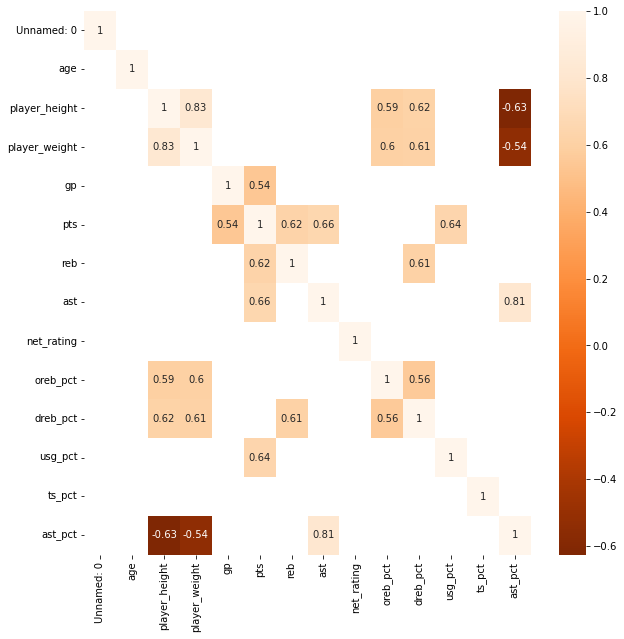

In [10]:
#Correlation between data
plt.figure(figsize=(10,10))

correlate = nba_data.corr()
correlation = correlate[abs(correlate)> 0.5]
sns.heatmap(correlation, annot=True, cmap = plt.cm.Oranges_r)